In [1]:
# Let's import our imports ;)
from telco_setup import telco_imports
telco_imports()


import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as m
from scipy import stats
from stat_tools import *
from sklearn.model_selection import train_test_split
import acquire
import prepare
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import lux
    


In [2]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as m
from scipy import stats
from stat_tools import *
from sklearn.model_selection import train_test_split
import acquire
import prepare
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import lux

In [3]:
df = acquire.get_telco_data()

In [4]:
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [6]:
df.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   senior_citizen         7043 non-null   int64  
 3   partner                7043 non-null   object 
 4   dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   phone_service          7043 non-null   object 
 7   multiple_lines         7043 non-null   object 
 8   internet_service_type  7043 non-null   object 
 9   online_security        7043 non-null   object 
 10  online_backup          7043 non-null   object 
 11  device_protection      7043 non-null   object 
 12  tech_support           7043 non-null   object 
 13  streaming_tv           7043 non-null   object 
 14  streaming_movies       7043 non-null   object 
 15  cont

In [7]:
df.total_charges = pd.to_numeric(df.total_charges, errors='coerce')

In [8]:
df['null_charges'] = pd.to_numeric(df['total_charges'], errors='coerce').isnull()

df['total_charges'][df['null_charges'] == True] = df['monthly_charges'][df['null_charges'] == True]

/var/folders/n7/p9r5pxl53g99g0h4q1_h50fr0000gn/T/ipykernel_39701/3673192903.py:3: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [9]:
df.total_charges.value_counts(dropna=False)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [10]:
df.total_charges.isnull().value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [11]:
train, validate, test = prepare.split_data(df, 'churn')

Prepared df: (7043, 22)

Train: (4225, 22)
Validate: (1409, 22)
Test: (1409, 22)


In [22]:
# Here we are going to start examining our training data 
# First let's print the commands to look at every individual field and how it realates to churn
for i in train:
    print(f"sns.histplot(data=train, y='{i}', hue='churn', multiple='stack')")
    print(f"train['{i}'][df.churn == 'Yes'].value_counts()")
    print(f"train['{i}'][df.churn == 'No'].value_counts()")

sns.histplot(data=train, y='customer_id', hue='churn', multiple='stack')
train['customer_id'][df.churn == 'Yes'].value_counts()
train['customer_id'][df.churn == 'No'].value_counts()
sns.histplot(data=train, y='gender', hue='churn', multiple='stack')
train['gender'][df.churn == 'Yes'].value_counts()
train['gender'][df.churn == 'No'].value_counts()
sns.histplot(data=train, y='senior_citizen', hue='churn', multiple='stack')
train['senior_citizen'][df.churn == 'Yes'].value_counts()
train['senior_citizen'][df.churn == 'No'].value_counts()
sns.histplot(data=train, y='partner', hue='churn', multiple='stack')
train['partner'][df.churn == 'Yes'].value_counts()
train['partner'][df.churn == 'No'].value_counts()
sns.histplot(data=train, y='dependents', hue='churn', multiple='stack')
train['dependents'][df.churn == 'Yes'].value_counts()
train['dependents'][df.churn == 'No'].value_counts()
sns.histplot(data=train, y='tenure', hue='churn', multiple='stack')
train['tenure'][df.churn == 'Yes'].value_co

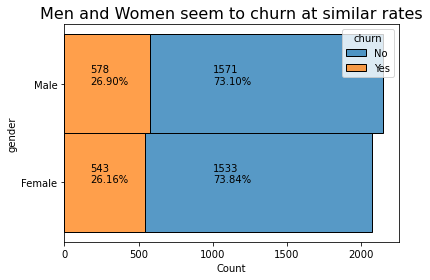

In [106]:
sns.histplot(data=train, y='gender', hue='churn', multiple='stack')
plt.title('Men and Women seem to churn at similar rates',fontdict={'fontsize':16})
plt.text(175,'Male',f'578\n{Percent(578/(578+1571))}')
plt.text(175,"Female", f'543\n{Percent(543/(543+1533))}')
plt.text(1000,'Male', f'1571\n{Percent(1571/(578+1571))}')
plt.text(1000,'Female', f'1533\n{Percent(1533/(543+1533))}')
plt.show()

In [100]:
train['gender'][df.churn == 'Yes'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [28]:
train['gender'][df.churn == 'No'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

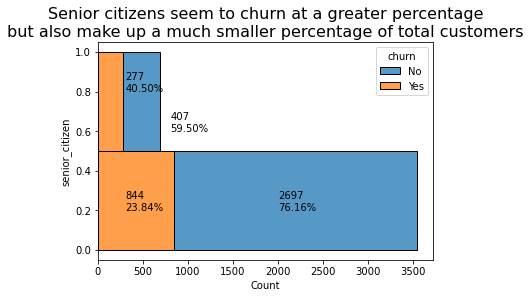

In [134]:
sns.histplot(data=train, y='senior_citizen', hue='churn', multiple='stack', bins=2)
plt.text(300,.8,f'277\n{Percent(277/(277+407))}')
plt.text(800,.6,f'407\n{Percent(407/(277+407))}')
plt.text(300,.2,f'844\n{Percent(844/(844+2697))}')
plt.text(2000,.2,f'2697\n{Percent(2697/(844+2697))}')
plt.title('Senior citizens seem to churn at a greater percentage\n\
but also make up a much smaller percentage of total customers',
          fontdict={'fontsize':16}
         )
plt.show()

In [30]:
train['senior_citizen'][df.churn == 'Yes'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [31]:
train['senior_citizen'][df.churn == 'No'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

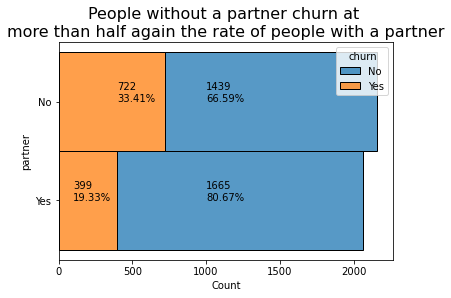

In [135]:
sns.histplot(data=train, y='partner', hue='churn', multiple='stack')
plt.title('People without a partner churn at \n\
more than half again the rate of people with a partner',
         fontdict={'fontsize':16})
plt.text(400, 'No', f'722\n{Percent(722/(722+1439))}')
plt.text(1000, 'No', f'1439\n{Percent(1439/(722+1439))}')
plt.text(100, 'Yes', f'399\n{Percent(399/(399+1665))}')
plt.text(1000, 'Yes', f'1665\n{Percent(1665/(399+1665))}')
plt.show()

In [33]:
train['partner'][df.churn == 'Yes'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [34]:
train['partner'][df.churn == 'No'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<AxesSubplot:xlabel='Count', ylabel='dependents'>

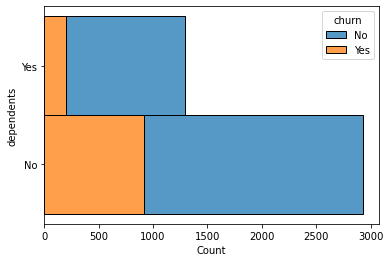

In [35]:
sns.histplot(data=train, y='dependents', hue='churn', multiple='stack')

In [36]:
train['dependents'][df.churn == 'Yes'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [37]:
train['dependents'][df.churn == 'No'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

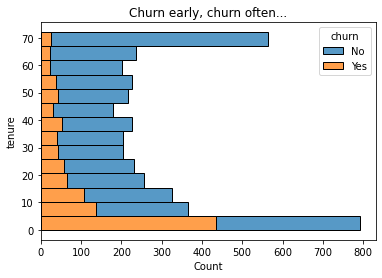

In [111]:
sns.histplot(data=train, y='tenure', hue='churn', multiple='stack')
plt.title('Churn early, churn often...')
plt.show()

In [39]:
train['tenure'][df.churn == 'Yes'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [40]:
train['tenure'][df.churn == 'No'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

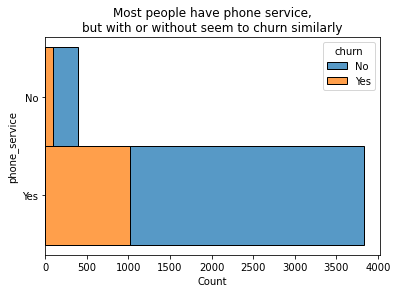

In [112]:
sns.histplot(data=train, y='phone_service', hue='churn', multiple='stack')
plt.title('Most people have phone service,\nbut with or without seem to churn similarly')
plt.show()

In [42]:
train['phone_service'][df.churn == 'Yes'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [43]:
train['phone_service'][df.churn == 'No'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

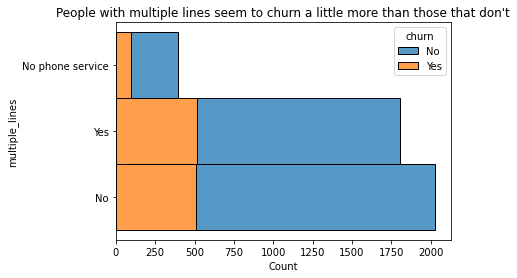

In [113]:
sns.histplot(data=train, y='multiple_lines', hue='churn', multiple='stack')
plt.title('People with multiple lines seem to churn a little more than those that don\'t')
plt.show()

In [114]:
ml_chr_yes = train['multiple_lines'][df.churn == 'Yes'].value_counts()
ml_chr_yes

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [115]:
ml_chr_no = train['multiple_lines'][df.churn == 'No'].value_counts()
ml_chr_no

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [117]:
ml_chr_yes / (ml_chr_yes + ml_chr_no)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

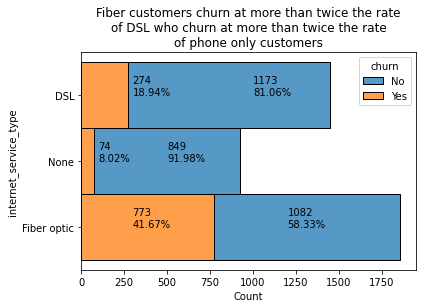

In [137]:
sns.histplot(data=train, y='internet_service_type', hue='churn', multiple='stack')
plt.title('Fiber customers churn at more than twice the rate\n\
of DSL who churn at more than twice the rate\nof phone only customers')
plt.text(300, 'DSL',f'{isty[1]}\n{Percent(isty[1]/(isty[1]+istn[0]))}')
plt.text(1000, 'DSL',f'{istn[0]}\n{Percent(istn[0]/(isty[1]+istn[0]))}')
plt.text(100, 'None',f'{isty[2]}\n{Percent(isty[2]/(isty[2]+istn[2]))}')
plt.text(500, 'None',f'{istn[2]}\n{Percent(istn[2]/(isty[2]+istn[2]))}')
plt.text(300, 'Fiber optic',f'{isty[0]}\n{Percent(isty[0]/(isty[0]+istn[1]))}')
plt.text(1200, 'Fiber optic',f'{istn[1]}\n{Percent(istn[1]/(isty[0]+istn[1]))}')
plt.show()

In [118]:
isty = train['internet_service_type'][df.churn == 'Yes'].value_counts()
isty

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [119]:
istn = train['internet_service_type'][df.churn == 'No'].value_counts()
istn

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<AxesSubplot:xlabel='Count', ylabel='online_security'>

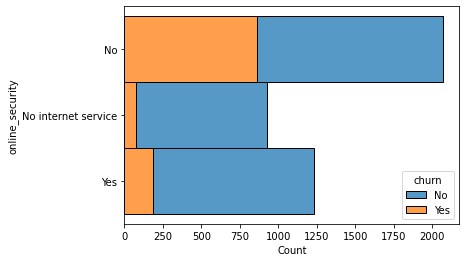

In [50]:
sns.histplot(data=train, y='online_security', hue='churn', multiple='stack')

In [51]:
train['online_security'][df.churn == 'Yes'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [52]:
train['online_security'][df.churn == 'No'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<AxesSubplot:xlabel='Count', ylabel='online_backup'>

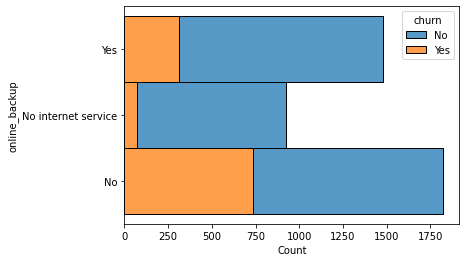

In [53]:
sns.histplot(data=train, y='online_backup', hue='churn', multiple='stack')

In [54]:
train['online_backup'][df.churn == 'Yes'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [55]:
train['online_backup'][df.churn == 'No'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<AxesSubplot:xlabel='Count', ylabel='device_protection'>

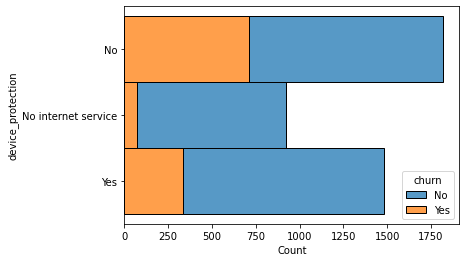

In [56]:
sns.histplot(data=train, y='device_protection', hue='churn', multiple='stack')

In [57]:
train['device_protection'][df.churn == 'Yes'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [58]:
train['device_protection'][df.churn == 'No'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<AxesSubplot:xlabel='Count', ylabel='tech_support'>

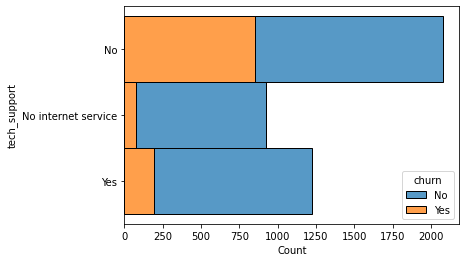

In [59]:
sns.histplot(data=train, y='tech_support', hue='churn', multiple='stack')

In [60]:
train['tech_support'][df.churn == 'Yes'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [61]:
train['tech_support'][df.churn == 'No'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<AxesSubplot:xlabel='Count', ylabel='streaming_tv'>

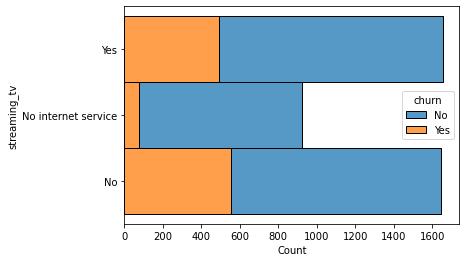

In [62]:
sns.histplot(data=train, y='streaming_tv', hue='churn', multiple='stack')

In [63]:
train['streaming_tv'][df.churn == 'Yes'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [64]:
train['streaming_tv'][df.churn == 'No'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<AxesSubplot:xlabel='Count', ylabel='streaming_movies'>

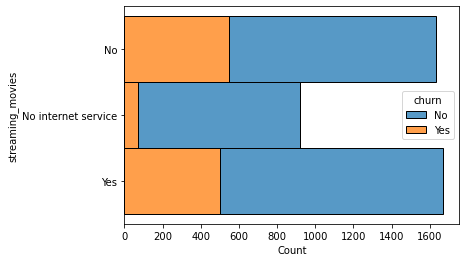

In [65]:
sns.histplot(data=train, y='streaming_movies', hue='churn', multiple='stack')

In [66]:
train['streaming_movies'][df.churn == 'Yes'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [67]:
train['streaming_movies'][df.churn == 'No'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

# People with streaming_tv or movies churn at similar rates<br><br>But people without online_security, backup, tech support, and device protection churn at higher rates

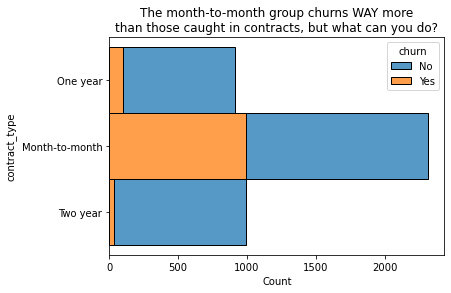

In [126]:
sns.histplot(data=train, y='contract_type', hue='churn', multiple='stack')
plt.title('The month-to-month group churns WAY more\nthan those caught in contracts, but what can you do?')
plt.show()

In [69]:
train['contract_type'][df.churn == 'Yes'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [70]:
train['contract_type'][df.churn == 'No'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

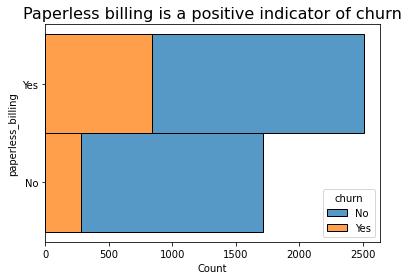

In [143]:
sns.histplot(data=train, y='paperless_billing', hue='churn', multiple='stack')
plt.title('Paperless billing is a positive indicator of churn', 
          fontdict={'fontsize':16}
         )

plt.show()

In [72]:
train['paperless_billing'][df.churn == 'Yes'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [73]:
train['paperless_billing'][df.churn == 'No'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

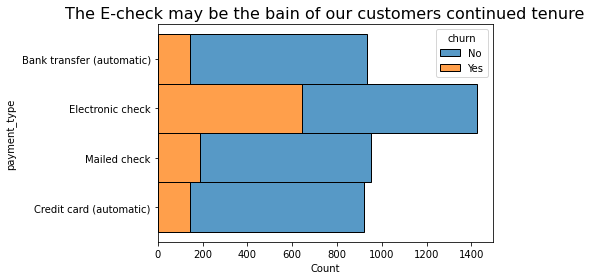

In [145]:
sns.histplot(data=train, y='payment_type', hue='churn', multiple='stack')
plt.title('The E-check may be the bain of our customers continued tenure',
          fontdict={'fontsize':16}
         )

plt.show()

In [147]:
train['payment_type'][df.churn == 'Yes'].value_counts(sort=False)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [148]:
train['payment_type'][df.churn == 'No'].value_counts(sort=False)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<AxesSubplot:xlabel='Count', ylabel='monthly_charges'>

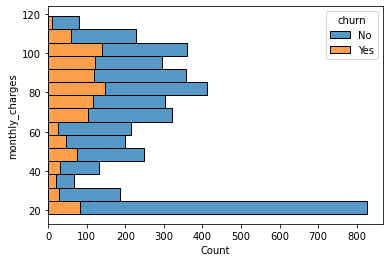

In [77]:
sns.histplot(data=train, y='monthly_charges', hue='churn', multiple='stack')

In [78]:
train['monthly_charges'][df.churn == 'Yes'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [79]:
train['monthly_charges'][df.churn == 'No'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<AxesSubplot:xlabel='Count', ylabel='total_charges'>

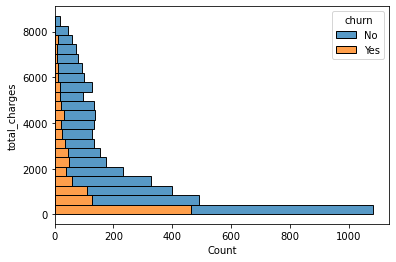

In [80]:
sns.histplot(data=train, y='total_charges', hue='churn', multiple='stack')

In [81]:
train['total_charges'][df.churn == 'Yes'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [82]:
train['total_charges'][df.churn == 'No'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()